In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["savefig.facecolor"] = "white"

players_2016 = pd.read_csv('data/2016-17/cleaned_players.csv')

type(players_2016)

idx = players_2016.index
shape = players_2016.shape
cols = players_2016.columns

print (idx, shape)
print (cols)



RangeIndex(start=0, stop=683, step=1) (683, 17)
Index(['first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent'],
      dtype='object')


In [2]:
players_2016.head()



,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent
0,David,Ospina,0,0,2,143,4,0.0,28.8,0,0,18,2.9,0,0,0,0.2
1,Petr,Cech,0,0,134,3097,37,0.1,819.8,0,2,660,82.0,12,0,2,13.7
2,Laurent,Koscielny,2,1,121,2821,37,53.9,831.2,239,19,723,112.7,10,1,4,11.2
3,Per,Mertesacker,0,0,1,38,1,0.1,17.8,0,0,5,1.8,0,0,0,0.2
4,Gabriel Armando,de Abreu,0,0,45,1517,18,84.5,295.8,119,2,296,50.0,5,0,6,0.8


In [3]:
players_2016.tail()


,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent
678,Sam,Surridge,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
679,Angel,Gomes,0,0,1,3,0,3.8,0.8,0,0,2,0.5,0,0,0,0.0
680,Kieran,O'Hara,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
681,Gerhard,Tremmel,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
682,Rene,Gilmartin,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0


In [4]:
players_raw_2016 = pd.read_csv('data/2016-17/players_raw.csv')

players_raw_2016.columns


Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id',
       'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in',
       'loans_out', 'minutes', 'news', 'now_cost', 'own_goals',
       'penalties_missed', 'penalties_saved', 'photo', 'points_per_game',
       'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special',
       'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points',
       'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'web_name',
       'yellow_cards'],
      dtype='object')

In [5]:
players_raw_2016.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   assists                       683 non-null    int64  
 1   bonus                         683 non-null    int64  
 2   bps                           683 non-null    int64  
 3   chance_of_playing_next_round  683 non-null    object 
 4   chance_of_playing_this_round  683 non-null    object 
 5   clean_sheets                  683 non-null    int64  
 6   code                          683 non-null    int64  
 7   cost_change_event             683 non-null    int64  
 8   cost_change_event_fall        683 non-null    int64  
 9   cost_change_start             683 non-null    int64  
 10  cost_change_start_fall        683 non-null    int64  
 11  creativity                    683 non-null    float64
 12  dreamteam_count               683 non-null    int64  
 13  ea_in

In [6]:
players_raw_2016.head()


,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,...,threat,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
0,0,0,18,100,100,0,48844,0,0,-3,...,0.0,2,3433,0,7905,0,0.0,0.4,Ospina,0
1,0,2,660,100,100,12,11334,0,0,-1,...,0.0,134,432837,0,590727,0,0.0,24.8,Cech,2
2,1,19,723,0,75,10,51507,0,0,1,...,239.0,121,965040,0,857277,0,0.0,19.8,Koscielny,4
3,0,0,5,100,100,0,17127,0,0,-2,...,0.0,1,2141,0,5912,0,0.0,0.2,Mertesacker,0
4,0,2,296,75,100,5,158074,0,0,-2,...,119.0,45,119600,0,100361,0,0.0,9.4,Gabriel,6


In [7]:
bps=players_raw_2016['bps']
bps.head()


0     18
1    660
2    723
3      5
4    296
Name: bps, dtype: int64

In [8]:
players_raw_2016["team"].value_counts()



18    42
5     40
11    38
7     38
15    38
20    38
13    34
1     34
9     33
12    33
14    33
16    33
10    32
2     32
4     32
3     32
17    31
6     30
8     30
19    30
Name: team, dtype: int64

In [9]:
# This is the position of the player  GKP, DEF, MID, FWD
players_raw_2016["element_type"].value_counts()


3    292
2    214
4    104
1     73
Name: element_type, dtype: int64

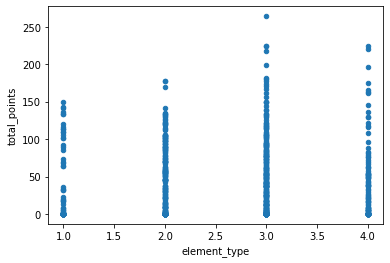

In [10]:
players_raw_2016.plot(kind="scatter", x='element_type', y='total_points')
plt.show()


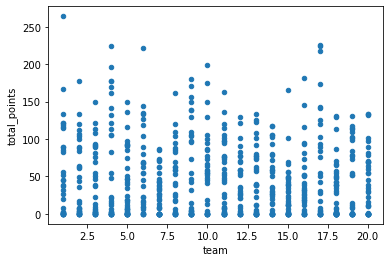

In [11]:
players_raw_2016.plot(kind="scatter", x='team', y='total_points')
plt.show()


In [12]:
players_clean=players_raw_2016[players_raw_2016['total_points'] != 0]
players_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 679
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   assists                       520 non-null    int64  
 1   bonus                         520 non-null    int64  
 2   bps                           520 non-null    int64  
 3   chance_of_playing_next_round  520 non-null    object 
 4   chance_of_playing_this_round  520 non-null    object 
 5   clean_sheets                  520 non-null    int64  
 6   code                          520 non-null    int64  
 7   cost_change_event             520 non-null    int64  
 8   cost_change_event_fall        520 non-null    int64  
 9   cost_change_start             520 non-null    int64  
 10  cost_change_start_fall        520 non-null    int64  
 11  creativity                    520 non-null    float64
 12  dreamteam_count               520 non-null    int64  
 13  ea_in

In [41]:
points = players_clean['total_points'] 
points.describe(percentiles=[.10, .30, .50, .80, .90])


count    520.000000
mean      59.840385
std       48.761259
min        1.000000
10%        4.000000
30%       25.000000
50%       52.000000
80%      102.000000
90%      126.100000
max      264.000000
Name: total_points, dtype: float64

In [14]:
# Let's try and learn about the top 10% players_2016
top_points = players_clean[players_clean['total_points'] > 126]
top_points.describe()



,assists,bonus,bps,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,...,team_code,threat,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,yellow_cards
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.0,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,5.200000e+01,52.0,5.200000e+01,52.0,52.0,52.000000,52.000000
mean,6.230769,17.192308,630.923077,11.038462,51454.134615,0.0,0.0,1.307692,-1.307692,651.265385,...,24.153846,816.461538,159.615385,1.372917e+06,0.0,1.211628e+06,0.0,0.0,22.334615,3.942308
std,4.841064,8.201001,124.724142,3.486453,28561.117394,0.0,0.0,4.487623,4.487623,448.714158,...,25.264394,557.633848,32.068037,8.941170e+05,0.0,8.597003e+05,0.0,0.0,3.624258,2.546920
min,0.000000,0.000000,382.000000,3.000000,7958.000000,0.0,0.0,-7.000000,-11.000000,0.000000,...,1.000000,0.000000,127.000000,7.912700e+04,0.0,1.623940e+05,0.0,0.0,13.800000,0.000000
25%,3.000000,13.000000,542.250000,8.000000,33250.000000,0.0,0.0,-2.250000,-4.250000,422.200000,...,8.000000,300.750000,134.000000,7.193405e+05,0.0,5.848035e+05,0.0,0.0,19.850000,2.000000
50%,5.500000,16.000000,637.000000,11.000000,42839.000000,0.0,0.0,0.000000,0.000000,624.350000,...,14.000000,813.000000,149.000000,1.268391e+06,0.0,1.049336e+06,0.0,0.0,22.550000,4.000000
75%,9.000000,21.250000,686.000000,14.000000,78212.750000,0.0,0.0,4.250000,2.250000,799.850000,...,32.000000,1161.250000,175.500000,1.879952e+06,0.0,1.719322e+06,0.0,0.0,24.700000,5.250000
max,21.000000,33.000000,920.000000,17.000000,110979.000000,0.0,0.0,11.000000,7.000000,1702.000000,...,91.000000,1896.000000,264.000000,4.044050e+06,0.0,3.691225e+06,0.0,0.0,29.200000,10.000000


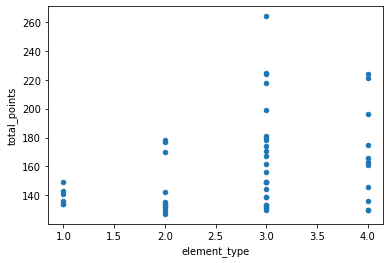

In [15]:
top_points.plot(kind="scatter", x='element_type', y='total_points')
plt.show()


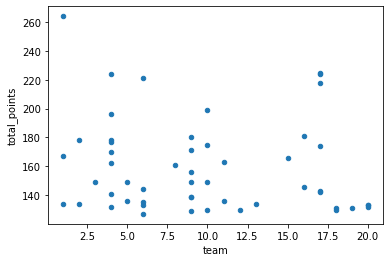

In [16]:
top_points.plot(kind="scatter", x='team', y='total_points')
plt.show()

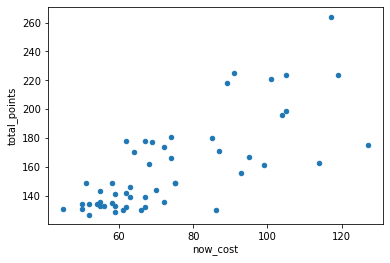

In [17]:
top_points.plot(kind="scatter", x='now_cost', y='total_points')
plt.show()

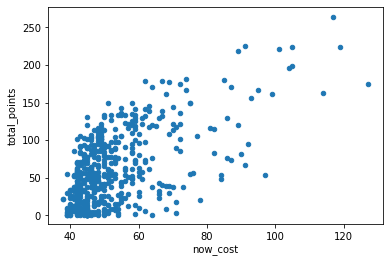

In [18]:
players_clean.plot(kind="scatter", x='now_cost', y='total_points')
plt.show()

In [19]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

my_url="https://www.premierleague.com/history/season-reviews/54"
uClient = uReq(my_url)
page_html = uClient.read()

uClient.close()

page_soup = soup(page_html, "html.parser")

teamList = []
divTeams = page_soup.find("div", {"class":"table tableSmall homeStandings js-standings-entry-container"})
teams = divTeams.findAll("tr")
for t in teams:
    try:
        teamList.append(int(t['data-filtered-table-row']))
        # t['data-filtered-table-row-name'])
    finally:
        continue

print(teamList)
    

[4, 21, 11, 10, 1, 12, 7, 20, 127, 36, 25, 26, 42, 6, 45, 43, 33, 41, 13, 29]


In [20]:
# Now construct a DF 
posList = [x for x in range(1,21)]
list_labels = ['team', 'pos']
list_cols = [teamList, posList]
zipped = list(zip(list_labels, list_cols))
data = dict(zipped)

teamDF = pd.DataFrame(data)
print(teamDF)




    team  pos
0      4    1
1     21    2
2     11    3
3     10    4
4      1    5
5     12    6
6      7    7
7     20    8
8    127    9
9     36   10
10    25   11
11    26   12
12    42   13
13     6   14
14    45   15
15    43   16
16    33   17
17    41   18
18    13   19
19    29   20


In [21]:
# Now do a join between the position the team finished and the players

praw = pd.read_csv('data/2016-17/players_raw.csv', index_col='id')

pj = praw.join(teamDF, on='team', rsuffix='tl')
pj.info()

pj[["team_code", "team", "total_points", "pos"]]



<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 1 to 683
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   assists                       683 non-null    int64  
 1   bonus                         683 non-null    int64  
 2   bps                           683 non-null    int64  
 3   chance_of_playing_next_round  683 non-null    object 
 4   chance_of_playing_this_round  683 non-null    object 
 5   clean_sheets                  683 non-null    int64  
 6   code                          683 non-null    int64  
 7   cost_change_event             683 non-null    int64  
 8   cost_change_event_fall        683 non-null    int64  
 9   cost_change_start             683 non-null    int64  
 10  cost_change_start_fall        683 non-null    int64  
 11  creativity                    683 non-null    float64
 12  dreamteam_count               683 non-null    int64  
 13  ea_in

,team_code,team,total_points,pos
id,,,,
1,3,1,2,2.0
2,3,1,134,2.0
3,3,1,121,2.0
4,3,1,1,2.0
5,3,1,45,2.0
...,...,...,...,...
679,91,2,0,3.0
680,1,11,1,12.0
681,1,11,0,12.0


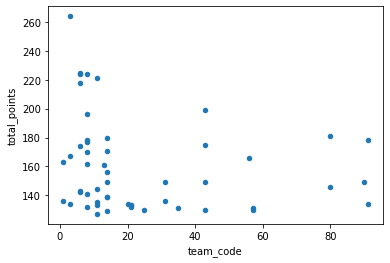

In [22]:
top_points.plot(kind="scatter", x='team_code', y='total_points')
plt.show()


In [ ]:
top_points.plot(kind="scatter", x='team', y='total_points')
plt.show()


In [23]:
import seaborn as sns





/Users/juan/venv-3.8.6/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


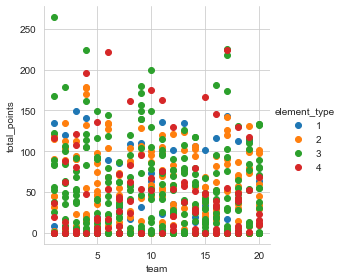

In [24]:

sns.set_style("whitegrid")
sns.FacetGrid(praw, hue="element_type", size=4).map(plt.scatter, "team", "total_points").add_legend()


/Users/juan/venv-3.8.6/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


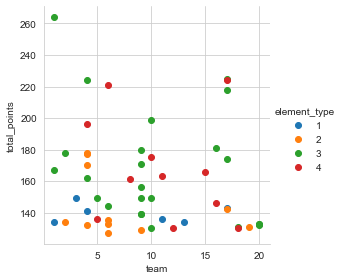

In [25]:
sns.FacetGrid(top_points, hue="element_type", size=4).map(plt.scatter, "team", "total_points").add_legend()


/Users/juan/venv-3.8.6/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


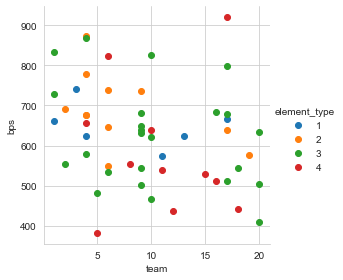

In [26]:
sns.FacetGrid(top_points, hue="element_type", size=4).map(plt.scatter, "team", "bps").add_legend()


In [74]:
# Analysis of column usefulness

useful_columns = ['assists',
                  'bonus',
                  'bps',
#                  'chance_of_playing_next_round',
#                  'chance_of_playing_this_round',
                  'clean_sheets',
                  'code',
                  'cost_change_event',
                  'cost_change_event_fall',
                  'cost_change_start',
                  'cost_change_start_fall',
                  'creativity',
                  'dreamteam_count',
                  'ea_index',
                  'element_type',
                  'ep_next',
                  'ep_this',
                  'event_points',
                  'form',
                  'goals_conceded',
                  'goals_scored',
                  'ict_index',
#                  'id',
                  'in_dreamteam',
                  'influence',
                  'minutes',
                  'now_cost',
                  'own_goals',
                  'penalties_missed',
                  'penalties_saved',
                  'points_per_game',
                  'red_cards',
                  'saves',
                  'selected_by_percent',
                  'special',
                  'squad_number',
                  'status',
                  'team',
                  'team_code',
                  'threat',
                  'total_points',
                  'transfers_in',
                  'transfers_in_event',
                  'transfers_out',
                  'transfers_out_event',
                  'value_form',
                  'value_season',
                  'yellow_cards']

# players_raw_2016.info()
# players_raw_2016['bps'].describe()
import time

c = {}
for i in useful_columns:
    c[i] = players_raw_2016[i]

for i in useful_columns:    
    c[i].describe()
    time.sleep(2)

c['value_form'].describe()
    

count    683.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: value_form, dtype: float64